# ***Online-Retail-Exploratory-Data-Analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from google.colab import files
uploded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = df.rename(columns={'InvoiceNo':'Invo_no','StockCode':'Sc','Description':'Desc','Quantity':'Qunt','InvoiceDate':'InvoDt','UnitPrice':'Uprice','CustomerID':'CusId'})
df.head()

,Invo_no,Sc,Desc,Qunt,InvoDt,Uprice,CusId,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
# duplicate_rows_df = df[df.duplicated()]
# print("number of duplicate rows: ", duplicate_rows_df.shape)
Duplicate_rows = df[df.duplicated()]
Duplicate_rows.shape

(5268, 8)

In [10]:
df.count()

Invo_no    541909
Sc         541909
Desc       540455
Qunt       541909
InvoDt     541909
Uprice     541909
CusId      406829
Country    541909
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,Invo_no,Sc,Desc,Qunt,InvoDt,Uprice,CusId,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.count()

Invo_no    536641
Sc         536641
Desc       535187
Qunt       536641
InvoDt     536641
Uprice     536641
CusId      401604
Country    536641
dtype: int64

In [14]:
df.isnull().sum()

Invo_no         0
Sc              0
Desc         1454
Qunt            0
InvoDt          0
Uprice          0
CusId      135037
Country         0
dtype: int64

In [18]:
df = df.dropna()
df.count()

Invo_no    401604
Sc         401604
Desc       401604
Qunt       401604
InvoDt     401604
Uprice     401604
CusId      401604
Country    401604
dtype: int64

In [19]:
df.isnull().sum()

Invo_no    0
Sc         0
Desc       0
Qunt       0
InvoDt     0
Uprice     0
CusId      0
Country    0
dtype: int64

# Detecting Outliers

<Axes: xlabel='Uprice'>

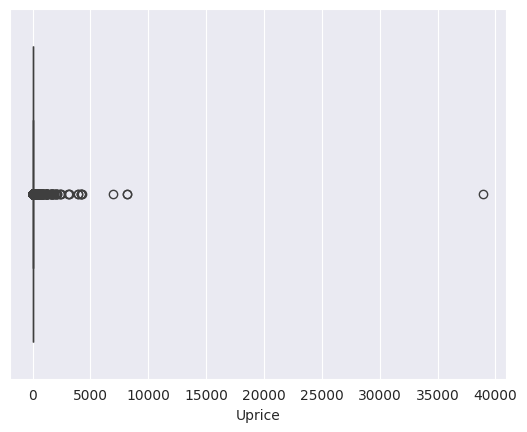

In [20]:
sns.boxplot(x = df['Uprice'])


<Axes: xlabel='Qunt'>

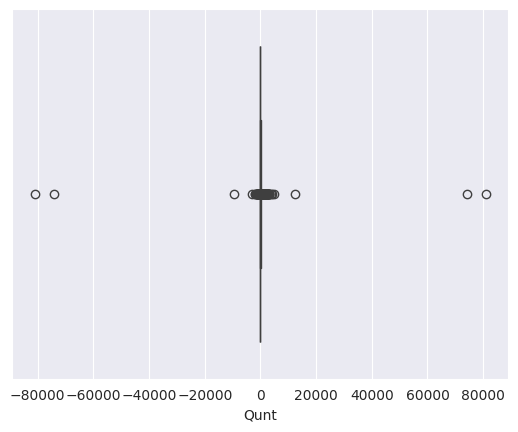

In [21]:
sns.boxplot(x = df['Qunt'])


In [101]:
Q1 = df['Uprice'].quantile(0.25)
Q3 = df['Uprice'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df = df[(df['Uprice'] >= Q1 - 1.5 * IQR) & (df['Uprice'] <= Q3 + 1.5 * IQR)]

Q1 = df['Qunt'].quantile(0.25)
Q3 = df['Qunt'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df = df[(df['Qunt'] >= Q1 - 1.5 * IQR) & (df['Qunt'] <= Q3 + 1.5 * IQR)]
df.shape

(323778, 10)

In [26]:
df['CusId'] = df['CusId'].astype('object')

# ***Analyzing Sales Trends Over Time :***

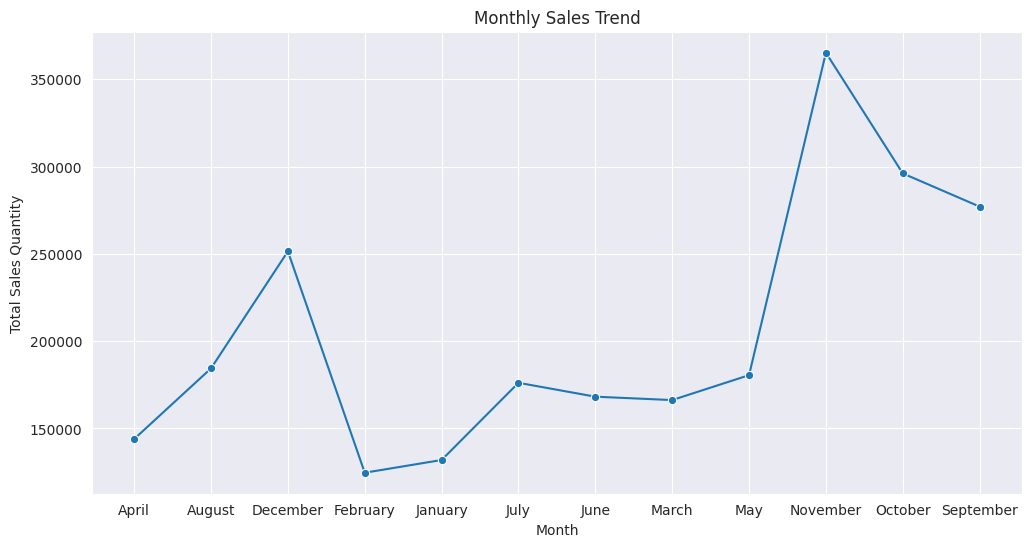

In [92]:
df['Month'] = df['InvoDt'].dt.month_name()
df['DayOfWeek'] = df['InvoDt'].dt.day_name()

# Monthly sales trend
monthly_sales = df.groupby('Month')['Qunt'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend')
plt.show()



<ipython-input-94-ec6410f1de39>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')


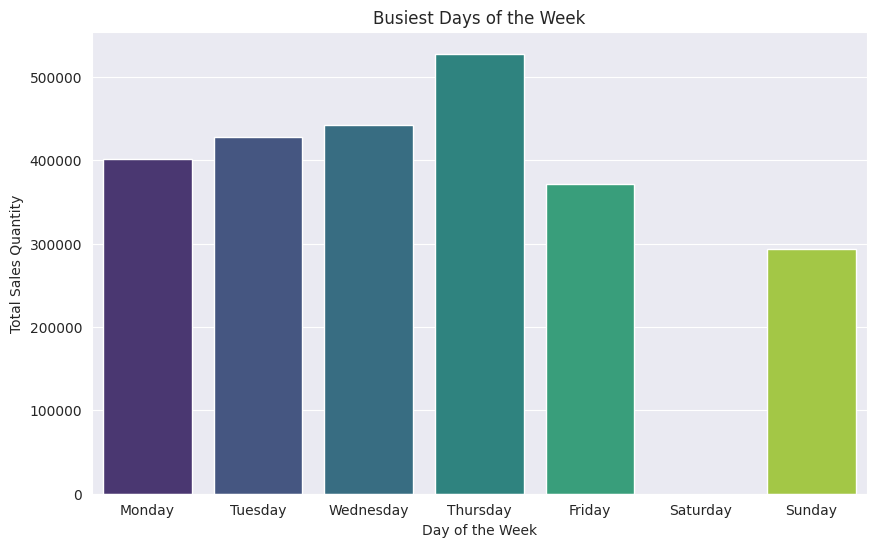

In [94]:
# Busiest days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = df.groupby('DayOfWeek')['Qunt'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.title('Busiest Days of the Week')
plt.show()

# ***Exploring Top-Selling Products and Countries:***

<ipython-input-99-114615eafc78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


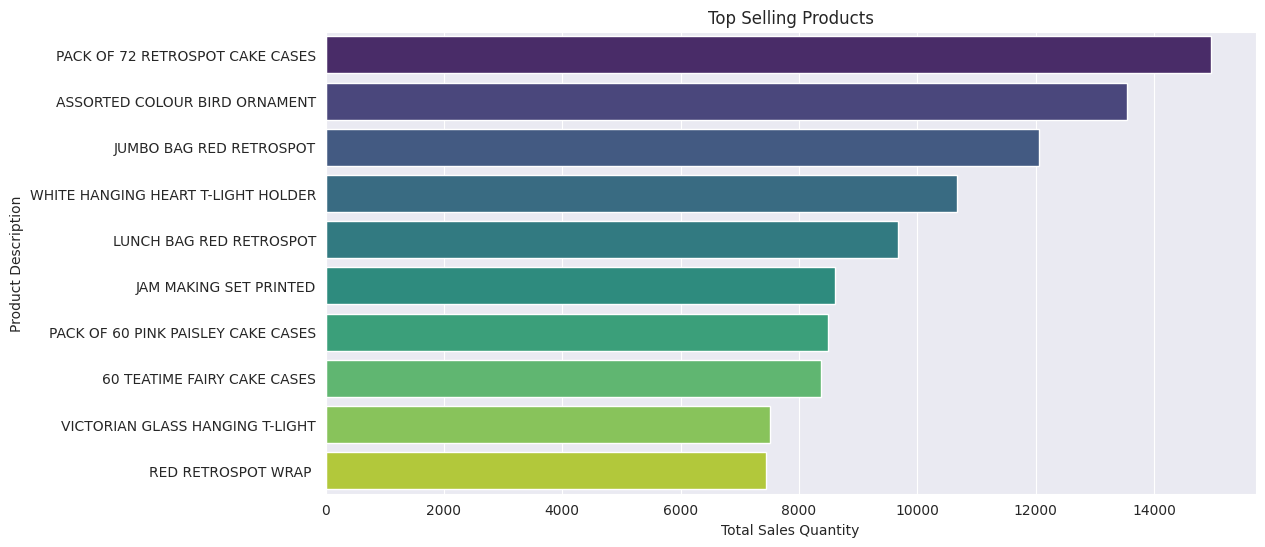

In [99]:
# Top-selling products
top_products = df.groupby('Desc')['Qunt'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Description')
plt.title('Top Selling Products')
plt.show()

<ipython-input-96-34c0bb47eb6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


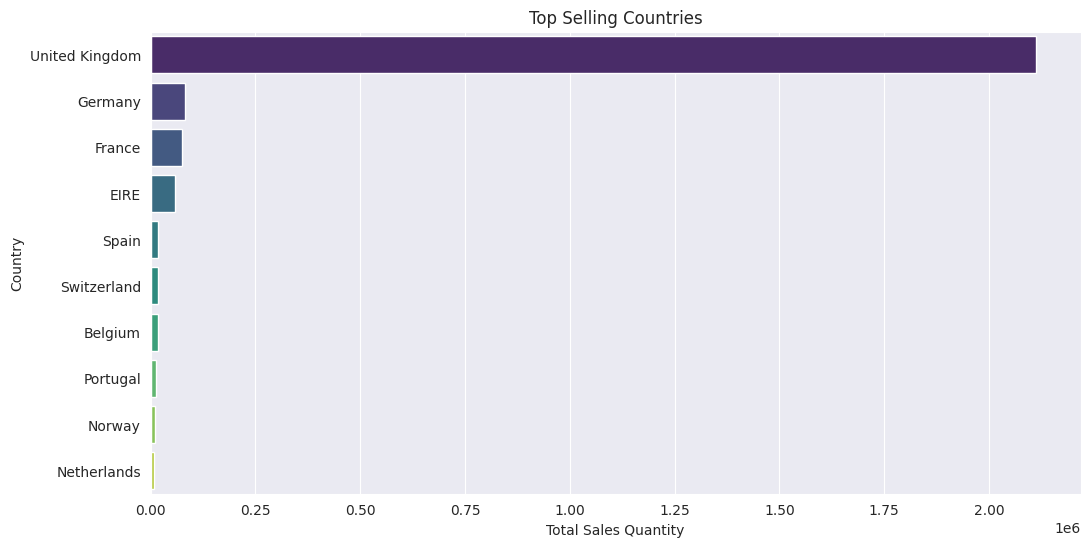

In [96]:
# Top-selling countries
top_countries = df.groupby('Country')['Qunt'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

# ***Identifying Outliers or Anomalies:***

<ipython-input-102-d14bbbe800a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Qunt'], palette='viridis')


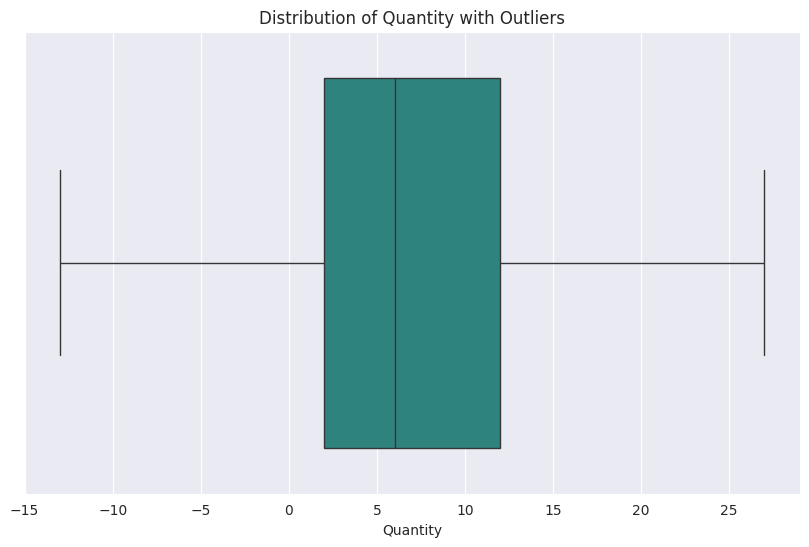

In [102]:
# Boxplot to identify outliers in quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Qunt'], palette='viridis')
plt.xlabel('Quantity')
plt.title('Distribution of Quantity with Outliers')
plt.show()
